In [72]:
import requests
import json
import xmltodict
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [2]:
serviceKey = r'qD9EPBoeW3jjfktf3X%2Ftr3syHNjWfOzloUDZ5WfJwKtsyVCRzFy2v4OfNffjH5ulAtfuFrINMfhraiEFLeVmNQ%3D%3D'

In [3]:
baseUrl = 'http://apis.data.go.kr/B551015/API38_1/ticketSalesRanking_1?'
parameter = f'serviceKey={serviceKey}&pageNo=1&numOfRows=60'
totalUrl = baseUrl + parameter

In [4]:
totalUrl

'http://apis.data.go.kr/B551015/API38_1/ticketSalesRanking_1?serviceKey=qD9EPBoeW3jjfktf3X%2Ftr3syHNjWfOzloUDZ5WfJwKtsyVCRzFy2v4OfNffjH5ulAtfuFrINMfhraiEFLeVmNQ%3D%3D&pageNo=1&numOfRows=60'

In [5]:
res = requests.get(totalUrl)
res.status_code
res.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><amtOrd>1</amtOrd><exaAmt>0</exaAmt><meet>서울</meet><plcAmt>279883200</plcAmt><qnlAmt>10794303700</qnlAmt><qplAmt>0</qplAmt><rcDate>20020908</rcDate><rcNo>12</rcNo><tlaAmt>0</tlaAmt><totalAmt>11156888600</totalAmt><triAmt>0</triAmt><winAmt>82701700</winAmt></item><item><amtOrd>2</amtOrd><exaAmt>0</exaAmt><meet>서울</meet><plcAmt>201144500</plcAmt><qnlAmt>10764621900</qnlAmt><qplAmt>0</qplAmt><rcDate>20020407</rcDate><rcNo>12</rcNo><tlaAmt>0</tlaAmt><totalAmt>11055846400</totalAmt><triAmt>0</triAmt><winAmt>90080000</winAmt></item><item><amtOrd>3</amtOrd><exaAmt>0</exaAmt><meet>서울</meet><plcAmt>289923400</plcAmt><qnlAmt>10530159600</qnlAmt><qplAmt>0</qplAmt><rcDate>20020915</rcDate><rcNo>13</rcNo><tlaAmt>0</tlaAmt><totalAmt>10918529500</totalAmt><triAmt>0</triAmt><winAmt>98446500</winAmt></item><item><amtOrd>4</amtOrd><exaAmt>

In [6]:
json.dumps(xmltodict.parse(res.text))

dictTemp = xmltodict.parse(res.text)

In [7]:
pd.DataFrame(dictTemp['response'])

,header,body
resultCode,00,NaN
resultMsg,NORMAL SERVICE.,NaN
items,NaN,"{'item': [{'amtOrd': '1', 'exaAmt': '0', 'meet..."
numOfRows,NaN,60
pageNo,NaN,1
totalCount,NaN,500


In [8]:
def getRequestUrl(url):
    try:
        res = requests.get(url, verify= False)
        if res.status_code == 200:
            return res.text
    except Exception as e:
        print(f'getRequestUrl() 함수 호출 예외 : {e}')
        return None

In [9]:
def getData(pageNo):
    serviceKey = r'qD9EPBoeW3jjfktf3X%2Ftr3syHNjWfOzloUDZ5WfJwKtsyVCRzFy2v4OfNffjH5ulAtfuFrINMfhraiEFLeVmNQ%3D%3D'
    baseUrl = 'http://apis.data.go.kr/B551015/API38_1/ticketSalesRanking_1?'
    parameter = f'serviceKey={serviceKey}&pageNo={pageNo}&numOfRows=60'
    
    totalUrl = baseUrl + parameter
    
    result = getRequestUrl(totalUrl)
    if result == None:
        return None
    else:
        return result

In [10]:
data = getData(5)

In [11]:
xmltodict.parse(data)['response']['body']['items']['item']

[{'amtOrd': '241',
  'exaAmt': '0',
  'meet': '서울',
  'plcAmt': '274039100',
  'qnlAmt': '7567878500',
  'qplAmt': '0',
  'rcDate': '20021208',
  'rcNo': '10',
  'tlaAmt': '0',
  'totalAmt': '7922060400',
  'triAmt': '0',
  'winAmt': '80142800'},
 {'amtOrd': '242',
  'exaAmt': '1382415000',
  'meet': '서울',
  'plcAmt': '75696500',
  'qnlAmt': '6083838300',
  'qplAmt': '335548600',
  'rcDate': '20041226',
  'rcNo': '11',
  'tlaAmt': '0',
  'totalAmt': '7918492200',
  'triAmt': '0',
  'winAmt': '40993800'},
 {'amtOrd': '243',
  'exaAmt': '0',
  'meet': '서울',
  'plcAmt': '253604100',
  'qnlAmt': '7572063500',
  'qplAmt': '0',
  'rcDate': '20020720',
  'rcNo': '9',
  'tlaAmt': '0',
  'totalAmt': '7912209000',
  'triAmt': '0',
  'winAmt': '86541400'},
 {'amtOrd': '244',
  'exaAmt': '0',
  'meet': '서울',
  'plcAmt': '328136700',
  'qnlAmt': '7472771900',
  'qplAmt': '0',
  'rcDate': '20021027',
  'rcNo': '9',
  'tlaAmt': '0',
  'totalAmt': '7910203200',
  'triAmt': '0',
  'winAmt': '109294600'

In [17]:
from tqdm import tqdm

In [13]:
Datas = []

for i in tqdm(range(1,11)):
    pageNo = i
    data = getData(pageNo)
    if xmltodict.parse(data)['response']['body']['items'] == None:
        resList = []
    else:
        resList = xmltodict.parse(data)['response']['body']['items']['item']

    Datas = Datas+resList

100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


In [14]:
len(Datas)

500

In [15]:
DatasList = pd.DataFrame(Datas)

In [16]:
DatasList.to_excel('./data/경마매출순위.xlsx',index = False)

In [18]:
Datas1 = pd.read_excel('./data/경마매출순위.xlsx')

In [21]:
# 가져온 데이터중 매출이 최종 매출이 가장 좋았던 날을 찾는다
Datas1.sort_values(by=['totalAmt'],ascending=False)

,amtOrd,exaAmt,meet,plcAmt,qnlAmt,qplAmt,rcDate,rcNo,tlaAmt,totalAmt,triAmt,winAmt
0,1,0,서울,279883200,10794303700,0,20020908,12,0,11156888600,0,82701700
1,2,0,서울,201144500,10764621900,0,20020407,12,0,11055846400,0,90080000
2,3,0,서울,289923400,10530159600,0,20020915,13,0,10918529500,0,98446500
3,4,0,서울,150472800,10600735200,0,20020526,12,0,10854858600,0,103650600
4,5,0,서울,193146800,10517902300,0,20020331,12,0,10829078000,0,118028900
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,1576939100,서울,81348800,5067093800,512258400,20070506,11,0,7278141000,0,40500900
496,497,1445420700,서울,53222700,3822258000,333654400,20120513,10,1567203500,7276109800,0,54350500
497,498,1459148900,서울,108058500,5646153600,0,20020519,7,0,7275995400,0,62634400
498,499,0,서울,268738500,6928995500,0,20030420,10,0,7273834900,0,76100900


In [44]:
# 경주장소, 일자, 날짜, 총 매출액을 제외한 값 삭제
Datas2 = Datas1.drop(Datas1.columns[[1,3,4,5,8,10,11]], axis=1)

In [45]:
# 컬럼명 변경
Datas3 = Datas2.rename(columns={'amtOrd':'매출순위','meet':'시행경마장명','rcDate':'경주일자','rcNo':'경주번호','totalAmt':'전체매출액'})

In [137]:
Datas2 = Datas2.rename(columns={'amtOrd':'매출순위','meet':'시행경마장명','rcDate':'경주일자','rcNo':'경주번호','totalAmt':'전체매출액'})

In [46]:
Datas3.head(10)

,매출순위,시행경마장명,경주일자,경주번호,전체매출액
0,1,서울,20020908,12,11156888600
1,2,서울,20020407,12,11055846400
2,3,서울,20020915,13,10918529500
3,4,서울,20020526,12,10854858600
4,5,서울,20020331,12,10829078000
5,6,서울,20020317,12,10752341600
6,7,서울,20020310,12,10693804100
7,8,서울,20020714,12,10586176300
8,9,서울,20020512,12,10475395300
9,10,서울,20011223,11,10460011400


In [47]:
# 천단위 콤마
Datas3['전체매출액'] = Datas3['전체매출액'].apply(lambda int_num : '{:,}'.format(int_num))

In [55]:
# 경주일자 타입 변경
Datas3['경주일자'] = Datas3['경주일자'].astype('str')

In [61]:
# 경주일자를 연년월로 나눔
Datas3['경주일자'] = Datas3['경주일자'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))

In [64]:
Datas3.to_excel('./data/경마매출액_정렬.xlsx', index= False)

In [153]:
Datas4 = pd.read_excel('./data/경마매출액_정렬.xlsx')

In [156]:
# 매출액 TOP10
DataTOP10 = Datas4.head(10)

In [157]:
DataTOP10

,매출순위,시행경마장명,경주일자,경주번호,전체매출액
0,1,서울,2002-09-08,12,"11,156,888,600"
1,2,서울,2002-04-07,12,"11,055,846,400"
2,3,서울,2002-09-15,13,"10,918,529,500"
3,4,서울,2002-05-26,12,"10,854,858,600"
4,5,서울,2002-03-31,12,"10,829,078,000"
5,6,서울,2002-03-17,12,"10,752,341,600"
6,7,서울,2002-03-10,12,"10,693,804,100"
7,8,서울,2002-07-14,12,"10,586,176,300"
8,9,서울,2002-05-12,12,"10,475,395,300"
9,10,서울,2001-12-23,11,"10,460,011,400"


In [158]:
Datas4['경주일자'] = Datas4['경주일자'].astype(str)

In [164]:
Datas4['경주일자'] = Datas4['경주일자'].str[:4]

In [166]:
Datas4.head()

,매출순위,시행경마장명,경주일자,경주번호,전체매출액
0,1,서울,2002,12,"11,156,888,600"
1,2,서울,2002,12,"11,055,846,400"
2,3,서울,2002,13,"10,918,529,500"
3,4,서울,2002,12,"10,854,858,600"
4,5,서울,2002,12,"10,829,078,000"


<bound method Series.max of 0      11,156,888,600
1      11,055,846,400
2      10,918,529,500
3      10,854,858,600
4      10,829,078,000
            ...      
495     7,278,141,000
496     7,276,109,800
497     7,275,995,400
498     7,273,834,900
499     7,273,047,800
Name: 전체매출액, Length: 500, dtype: object>

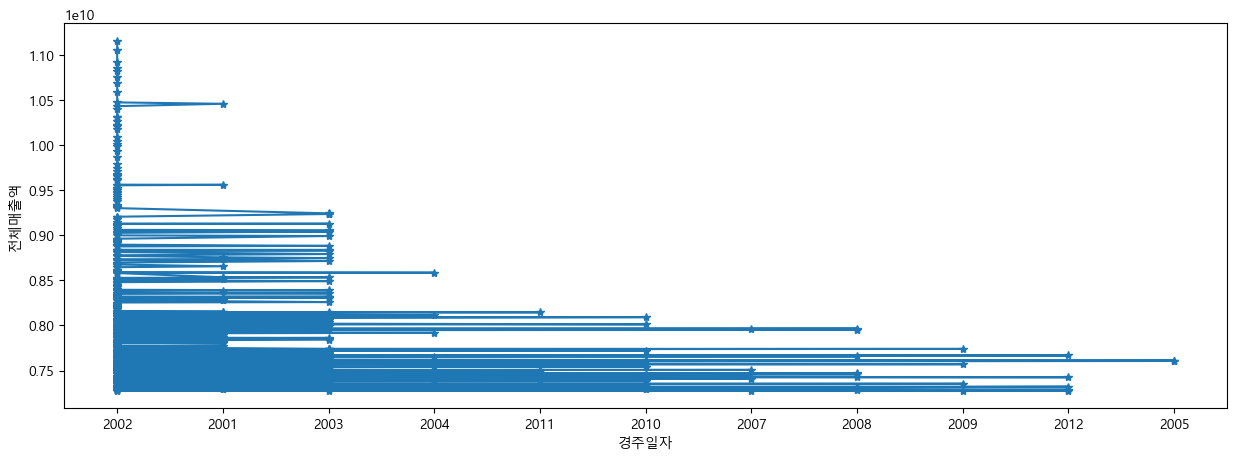

In [162]:
plt.figure(figsize=(15,5))
plt.plot(Datas4['경주일자'],Datas2['전체매출액'],marker = '*')
plt.xlabel('경주일자')
plt.ylabel('전체매출액')
plt.show()